In [22]:
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

## Сгенерируйте данные с помощью кода:
### from sklearn.datasets import make_classification
### x_data_generated, y_data_generated = make_classification(scale=1)

In [3]:
x, y = make_classification(scale=1)

## Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
### cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [4]:
cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()

0.8300000000000001

## Используйте статистические методы для отбора признаков:
### a) Выберите признаки на основе матрицы корреляции.
### b) Отсеките низковариативные признаки (VarianceThreshold).
### c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

<AxesSubplot:>

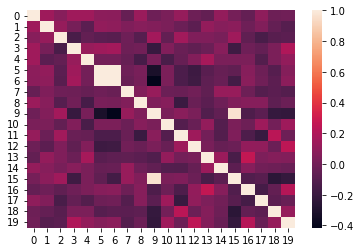

In [5]:
sns.heatmap(pd.DataFrame(x.tolist()).corr())

### Откидываем: 6, 15, 9, 3, 19, 18

In [48]:
x1 = pd.DataFrame(x.tolist()).drop(labels = [6, 15, 9, 3, 19, 18], axis = 1)
print(cross_val_score(LogisticRegression(), x1, y, scoring='accuracy').mean())
print(20 - len([6, 15, 9, 3, 19, 18]))

0.85
14


In [46]:
selector = VarianceThreshold(threshold=1.2)
print(cross_val_score(LogisticRegression(), selector.fit_transform(x), y, scoring='accuracy').mean())
len(selector.fit_transform(x)[0])

0.89


2

## Осуществите отбор признаков на основе дисперсионного анализа:
### a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
### b) Повторите п. 2 на отобранных признаках.

In [42]:
selector = (SelectKBest(f_classif, k=5))
print(cross_val_score(LogisticRegression(), selector.fit_transform(x, y), y, scoring='accuracy').mean())
len(selector.fit_transform(x, y)[0])

0.8800000000000001


5

## Отбор с использованием моделей:
### a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
### b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
### c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.
## Перебор признаков:
### a) SequentialFeatureSelector.
### b) Повторите п. 2 на отобранных признаках.

In [80]:
selector = LogisticRegression(penalty = 'l1', tol = 0.005, solver = "saga").fit(x, y)
col = []
k = 0
for i in selector.coef_[0]:
    if i != 0.0:
        col.append(k)
    k += 1
x1 = pd.DataFrame(x.tolist()).drop(labels = col, axis = 1)
print(cross_val_score(LogisticRegression(), x1, y, scoring='accuracy').mean())
len(col)

0.75


12

In [20]:
selector = RandomForestClassifier().fit(x, y)
x1 = pd.DataFrame(x.tolist())[[5, 6]]
print(cross_val_score(LogisticRegression(), x1, y, scoring='accuracy').mean())
selector.feature_importances_

0.9


array([0.03980655, 0.0147037 , 0.01791207, 0.03114814, 0.01863806,
       0.23349692, 0.31158795, 0.01798843, 0.03210932, 0.04458554,
       0.02643177, 0.01383749, 0.01689871, 0.02346615, 0.01262885,
       0.04325649, 0.01549918, 0.03972971, 0.02926959, 0.01700536])

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=1).fit(x, y)
print(cross_val_score(LogisticRegression(), sfs.transform(x), y, scoring='accuracy').mean())
sfs.get_support()

0.9099999999999999


array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

## Сформулируйте выводы по проделанной работе:
### a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [85]:
data = {'Cпособ выбора признаков': ['Матрица корелляции', 'VarianceThreshold', 'f_classif', 'L1 регуляризация', 
                                    'RandomForest', 'SequentialFeatureSelector'], 
        'Количество признаков': [14, 2, 5, 12, 2, 1], 
        'Средняя точность модели': [0.85, 0.89, 0.88, 0.75, 0.9, 0.91]} 
df = pd.DataFrame(data) 
df.head(6)

,Cпособ выбора признаков,Количество признаков,Средняя точность модели
0,Матрица корелляции,14,0.85
1,VarianceThreshold,2,0.89
2,f_classif,5,0.88
3,L1 регуляризация,12,0.75
4,RandomForest,2,0.90
5,SequentialFeatureSelector,1,0.91
